In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [10]:
data = pd.read_csv('feature_space.csv')

avg_speed = data['avg speed'].values
idle_time_percentage = data['idle time %'].values
avg_long_acceleration = data['avg long. acceleration'].values

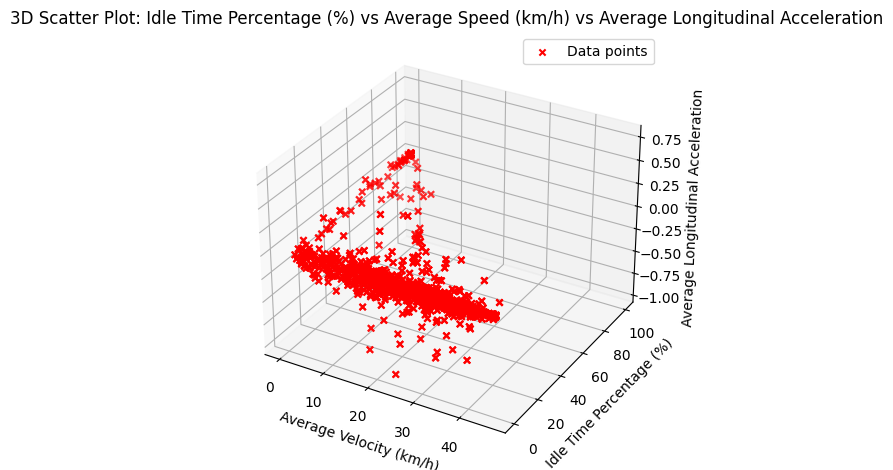

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with three parameters
ax.scatter(avg_speed, idle_time_percentage, avg_long_acceleration, c='red', marker='x', label='Data points')

ax.set_xlabel('Average Velocity (km/h)')
ax.set_ylabel('Idle Time Percentage (%)')
ax.set_zlabel('Average Longitudinal Acceleration')
ax.set_title('3D Scatter Plot: Idle Time Percentage (%) vs Average Speed (km/h) vs Average Longitudinal Acceleration')
ax.legend()
plt.tight_layout()
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4)
data_for_clustering = np.column_stack((avg_speed, idle_time_percentage, avg_long_acceleration))
kmeans_labels = kmeans.fit_predict(data_for_clustering)

c:\Users\kiran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


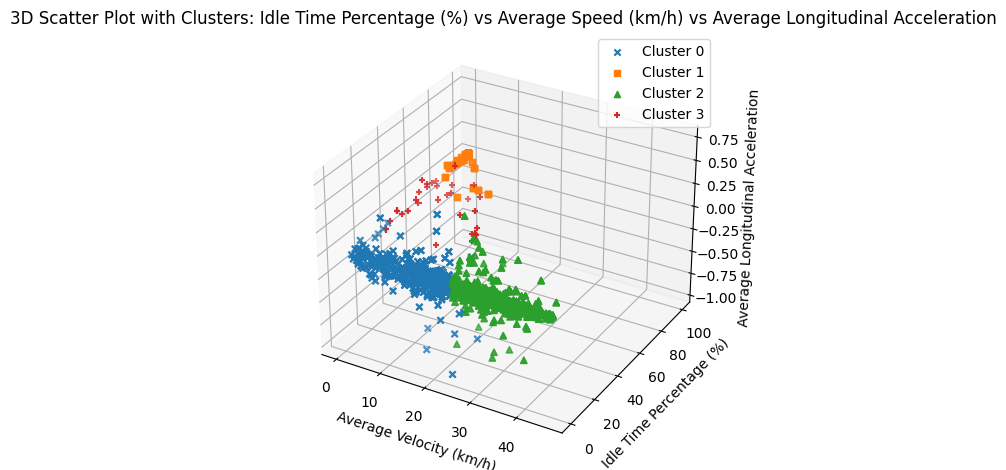

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

markers = ['x', 's', '^', '+']
for cluster_label in set(kmeans_labels):
    cluster_data = [(avg_speed[i], idle_time_percentage[i], avg_long_acceleration[i]) for i, label in enumerate(kmeans_labels) if label == cluster_label]
    cluster_avg_speed, cluster_idle_time, cluster_avg_long_acceleration = zip(*cluster_data)
    ax.scatter(cluster_avg_speed, cluster_idle_time, cluster_avg_long_acceleration, label=f'Cluster {cluster_label}', marker=markers[cluster_label])

ax.set_xlabel('Average Velocity (km/h)')
ax.set_ylabel('Idle Time Percentage (%)')
ax.set_zlabel('Average Longitudinal Acceleration')
ax.set_title('3D Scatter Plot with Clusters: Idle Time Percentage (%) vs Average Speed (km/h) vs Average Longitudinal Acceleration')
ax.legend()
plt.tight_layout()
plt.show()